<a href="https://colab.research.google.com/github/gondiam/gondiam/blob/main/tradingGITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [ ]:
#download data 
def get_data (symbol="BTC-USD"):
  data = yf.download(tickers=symbol,period= '7d',interval='1m')
  return data

#Calculate bollinger bands with roll=60 and confidence 1
def get_BB(data,roll=60,alpha=1):
  data['Middle Band'] = data ['Open'].rolling(window=roll).mean()
  data['Upper Band'] = data ['Middle Band'] + alpha*data ['Open'].rolling(window=roll).std()
  data['Lower Band'] = data ['Middle Band'] - alpha*data ['Open'].rolling(window=roll).std()
  return data

#Benefit during the period by Bollinger Bands
def get_trading(data,initial=1000):
  benefit = initial
  #benefit percentage
  percben = 0
  #number of shares
  nshare = 0 #nshare = 0
  signal = 0
  got = 0
  MB = data['Middle Band']
  LB = data['Lower Band']
  UB = data['Upper Band']
  Price = data ['Open']
  for i in range(LB.size):
    #If it's out of the band
    if (Price[i]<= LB[i] or Price[i]>=UB[i]):
      signal = 1
    else:
      signal = 0
    #If it's under the band and i don't have shares i buy
    if (Price[i]<=LB[i] and signal==1 and got == 0):
      buy = Price[i] 
      nshare = benefit/buy
      benefit -= nshare*buy
      got = 1

    #If it's over the band, the price is over i bought and i got shares i sell
    if (Price[i]>=UB[i] and signal==1 and got == 1 and Price[i]>=buy):
      sell = Price[i]
      benefit = nshare*sell
      nshare = 0
      got = 0
  #print()
  #print("Initial inversion: ",initial)
  if (benefit>0.1):
    perc_benefit = 100*(benefit-initial)/initial
  else:
    benefit = nshare*Price[-1]
    perc_benefit = 100*(nshare*Price[-1]-initial)/initial

    #print()
    #print("Change of price in time: ",100*(Price[-1]-Price[0])/Price[0],"%")
    #print("if I buy at the beginning and sell at the end: ", Price[-1]*initial/Price[0])
  return benefit,perc_benefit
def get_plot(data):
  plt.figure(figsize=(15,15))
  plt.title(' Bollinger Bands')
  plt.xlabel('Days')
  plt.ylabel('Closing Prices')
  plt.plot(data['Close'], label='Closing Prices')
  plt.plot(data['Middle Band'], label='Middle Band',c='b')
  plt.plot(data['Upper Band'], label='Bollinger Up', c='g')
  plt.plot(data['Lower Band'], label='Bollinger Down', c='r')

  plt.legend()
  plt.show()




In [ ]:
df = get_data()
df = get_BB(df)
benefit,perc_benefit = get_trading(df)
print(benefit,perc_benefit)

[*********************100%***********************]  1 of 1 completed
1023.5291205942967 2.3529120594296726


In [ ]:
import math
max_benefit = 0
max_i = 0
df = get_data()
max_roll = math.floor(round(0.05*df.shape[0],2))
for i in range(1,max_roll):
  #print("Roll number: ",i)
  df = get_BB(df,roll=i)
  benefit,perc_benefit = get_trading(df)
  if (benefit>max_benefit):
    print()
    print("New max benefit roll: ",i)
    max_benefit = benefit
    max_i = i
    print(max_benefit)
    print()
print()
print("Max benefit at roll: ",max_i," Max benefit: ",max_benefit)


[*********************100%***********************]  1 of 1 completed

New max benefit roll:  1
1000


New max benefit roll:  3
1032.9119404228884


New max benefit roll:  10
1035.974307503582


New max benefit roll:  43
1037.2999325066423


New max benefit roll:  44
1043.5473760704422


New max benefit roll:  45
1063.353434569105


New max benefit roll:  48
1071.6394901911508


Max benefit at roll:  48  Max benefit:  1071.6394901911508


[*********************100%***********************]  1 of 1 completed


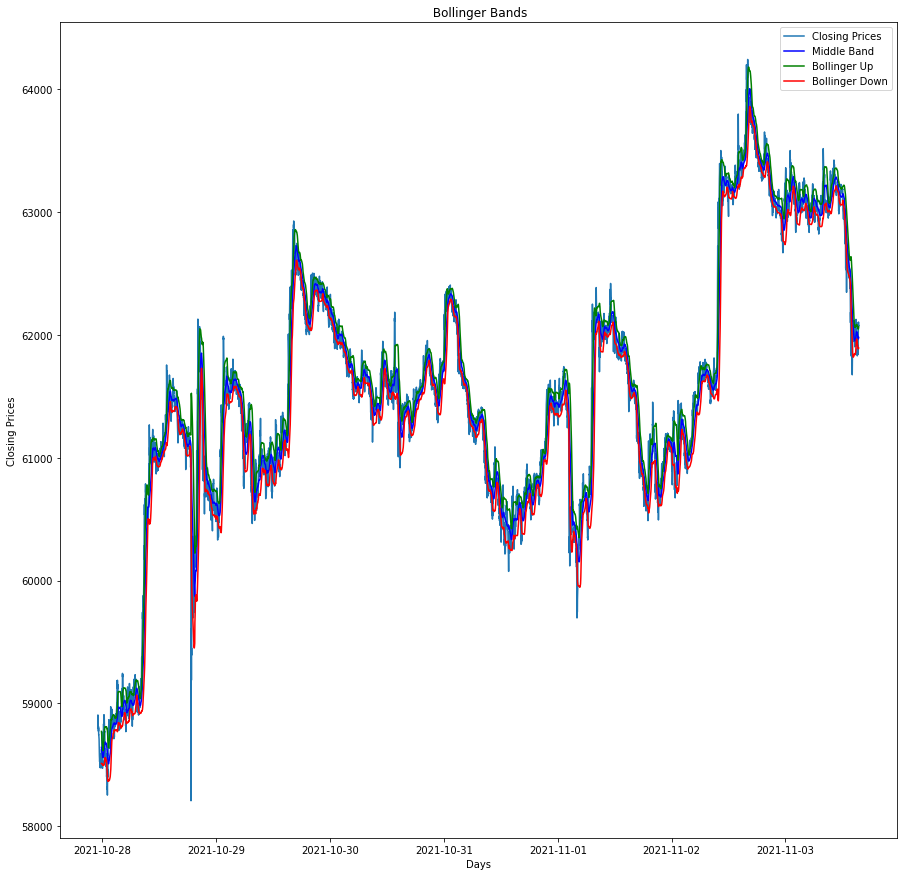

In [ ]:
df = get_data()
df = get_BB(df,roll=max_i)
get_plot(df)

In [ ]:
initial=1000
pone = 1+(max_benefit-initial)/initial;pone


1.0716394901911508

In [ ]:
pone**26

6.043192610794175

In [ ]:
(df['Close'][-1]/df['Close'][0])-1

0.055751531928610376